In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.pylab as plt2
import warnings
from pandas.tools.plotting import table
pd.options.display.max_colwidth = 100
warnings.filterwarnings('ignore')

# Helper Functions

In [2]:
def extract_dfs_cols(path, cols, state):
    return [[state+" "+file[-8:-4], pd.read_csv(file, usecols=cols)] for file in glob.glob(path)]

def extract_dfs(path, state):
    return [[state+" "+file[-8:-4], pd.read_csv(file)] for file in sorted(glob.glob(path))]

def sub_dfs(dfs, cols):
    return [[df[0], df[1][cols]] for df in dfs]

def print_frequent_items(dfs, col):
    [print(df[0], ": ", df[1][col].mode().tolist()[0]) for df in dfs]

def convert_notation(dfs, new_col, old_col):
    converted_dfs = []
    
    for df in dfs:
        df[new_col] = df[old_col].astype(int)
        df.drop([old_col], 1, inplace = True)
        df_new = df.sort_values(by=[new_col], ascending = False)
        df_new.name = df.name.capitalize()
        converted_dfs.append(df_new)
    
    return converted_dfs

def display_top_Nrow(dfs, N):
    for df in dfs:
        print(df.name)
        display(df.head(N))
        
def return_plot_lists(df, col_x, col_y):
    return df[col_x].tolist(), df[col_y].tolist()

def plot_line_costs(dfs, state, contains, col):
    x = [(df.name[-4:]) for df in dfs]
    y = [(df[df[col].str.contains(contains)]['cost'].tolist()[0]/1000000) for df in dfs]
    plt.plot(x,y)
    plt.xlabel('Time YRS')
    plt.ylabel('$ Millions')
    plt.title(state + ": "+ contains.lower().title())
    plt.savefig("figures/" + state + "/" + contains)
    
def bar_graphs(dfs, col, state, size, title):
    for df in dfs:
        f, ax = plt.subplots(figsize=(18,6))

        # divide each element in the cost list by a million
        y = [elem/1000000 for elem in df['cost'].tolist()[:size]]
        # store columns in x
        x = df[col].tolist()[:size]
        
        plt.bar(x, y)
          
        plt.xlabel(title, fontsize = 20, labelpad = 20)
        plt.ylabel('$ Million', fontsize = 20, labelpad = 20)
        plt.xticks(range(size), x, rotation = 15) 
        plt.title(df.name, fontsize = 20)
        
        plt.savefig("figures/" + state + "/" + col + "/" + df.name)
        
def output_dfs(dfs, col, size):
    
    cols = [str(i+1) for i in range(size)]
    names = [df[0][-4:] for df in dfs]
    
    top_10 = pd.DataFrame(index = names, columns = cols)

    for i, df in enumerate(dfs):
        indices = df[1][col].value_counts().index.tolist()[:size]
        indices = [index.lower().title() for index in indices]
        awards = df[1][col].value_counts().tolist()[:size]

        tuples = list(zip(indices, awards))
        top_10.iloc[i] = tuples

    display(top_10.head(len(names)))
    
def map_reduce(dfs, col_one, col_two):
    # store all dfs
    reduced_dfs = []
    
    for df in dfs:
        # if two columns are strings
        if type(df[1][col_two][0]) == str:
            reduced_df = df[1].groupby([col_one, col_two]).size().reset_index(name='Count')
        # otherwise, one is a string and another is a float 
        else:   
            reduced_df = df[1].groupby(by=[col_one], as_index = False)[col_two].sum()
        
        reduced_df.name = df[0]
        reduced_dfs.append(reduced_df)
    
    return reduced_dfs

def find_dfs(dfs, col, value):
    find_dfs = []
    for df in dfs:
        new_df = df[df[col].str.contains(value)]
        new_df.name = df.name
        find_dfs.append(new_df)
    return find_dfs

def award_costs(dfs, col, value):
    x = [(df.name[-4:]) for df in dfs]
    y = [(df[df[col].str.contains(contains)]['cost'].tolist()[0]/1000000) for df in dfs]
    plt.plot(x,y)
    plt.xlabel('Time YRS')
    plt.ylabel('$ Millions')
    plt.title(contains)
    plt.savefig("figures/" + state + "/" + contains)

# Store DFs

In [3]:
colorado_dfs = extract_dfs('final_project/mohd_work/datasets/colorado/*.csv', 'colorado')
arizona_dfs = extract_dfs('final_project/mohd_work/datasets/arizona/*.csv', 'arizona')

In [4]:
len(colorado_dfs)

9

# Most Frequent Awards

In [5]:
awards_colorado = sub_dfs(colorado_dfs, ['total_funding_amount', 'award_description'])
awards_arizona = sub_dfs(arizona_dfs, ['total_funding_amount', 'award_description'])

In [6]:
print_frequent_items(awards_colorado, 'award_description')
print()
print_frequent_items(awards_arizona, 'award_description')

colorado 2010 :  GRANT PROGRAM
colorado 2011 :  GRANT PROGRAM
colorado 2012 :  GRANT PROGRAM
colorado 2013 :  GRANT PROGRAM
colorado 2014 :  GRANT PROGRAM
colorado 2015 :  GRANT PROGRAM
colorado 2016 :  GRANT PROGRAM
colorado 2017 :  UNKNOWN TITLE
colorado 2018 :  PRICE LOSS COVERAGE PROGRAM

arizona 2010 :  GRANT PROGRAM
arizona 2011 :  GRANT PROGRAM
arizona 2012 :  GRANT PROGRAM
arizona 2013 :  GRANT PROGRAM
arizona 2014 :  GRANT PROGRAM
arizona 2015 :  GRANT PROGRAM
arizona 2016 :  GRANT PROGRAM
arizona 2017 :  UNKNOWN TITLE
arizona 2018 :  UNKNOWN TITLE


# Most Frequent Awarding Agency

In [7]:
col = 'awarding_agency_name'
col_money = 'total_funding_amount'

In [8]:
agency_colorado = sub_dfs(colorado_dfs, [col_money, col])
agency_arizona = sub_dfs(arizona_dfs, [col_money, col])

In [9]:
print_frequent_items(agency_colorado, col)
print()
print_frequent_items(agency_arizona, col)

colorado 2010 :  DEPARTMENT OF EDUCATION (ED)
colorado 2011 :  DEPARTMENT OF AGRICULTURE (USDA)
colorado 2012 :  DEPARTMENT OF AGRICULTURE (USDA)
colorado 2013 :  DEPARTMENT OF AGRICULTURE (USDA)
colorado 2014 :  DEPARTMENT OF AGRICULTURE (USDA)
colorado 2015 :  DEPARTMENT OF EDUCATION (ED)
colorado 2016 :  DEPARTMENT OF AGRICULTURE (USDA)
colorado 2017 :  DEPARTMENT OF AGRICULTURE (USDA)
colorado 2018 :  DEPARTMENT OF AGRICULTURE (USDA)

arizona 2010 :  DEPARTMENT OF EDUCATION (ED)
arizona 2011 :  DEPARTMENT OF EDUCATION (ED)
arizona 2012 :  DEPARTMENT OF EDUCATION (ED)
arizona 2013 :  DEPARTMENT OF EDUCATION (ED)
arizona 2014 :  DEPARTMENT OF EDUCATION (ED)
arizona 2015 :  DEPARTMENT OF EDUCATION (ED)
arizona 2016 :  DEPARTMENT OF EDUCATION (ED)
arizona 2017 :  DEPARTMENT OF EDUCATION (ED)
arizona 2018 :  DEPARTMENT OF EDUCATION (ED)


## Colorado Awarding Agencies

In [10]:
display((agency_colorado[1][1].head(3)))

,total_funding_amount,awarding_agency_name
0,441.0,DEPARTMENT OF AGRICULTURE (USDA)
1,5875.0,DEPARTMENT OF AGRICULTURE (USDA)
2,1412.0,DEPARTMENT OF AGRICULTURE (USDA)


In [11]:
colorado_reduced = map_reduce(agency_colorado, col, col_money) 
converted_reduced_colorado = convert_notation(colorado_reduced, 'cost', col_money)

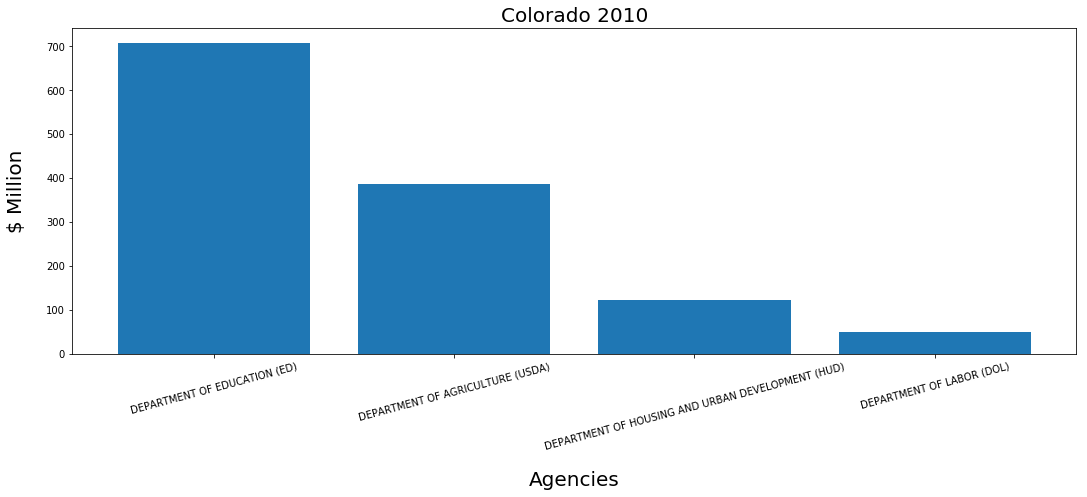

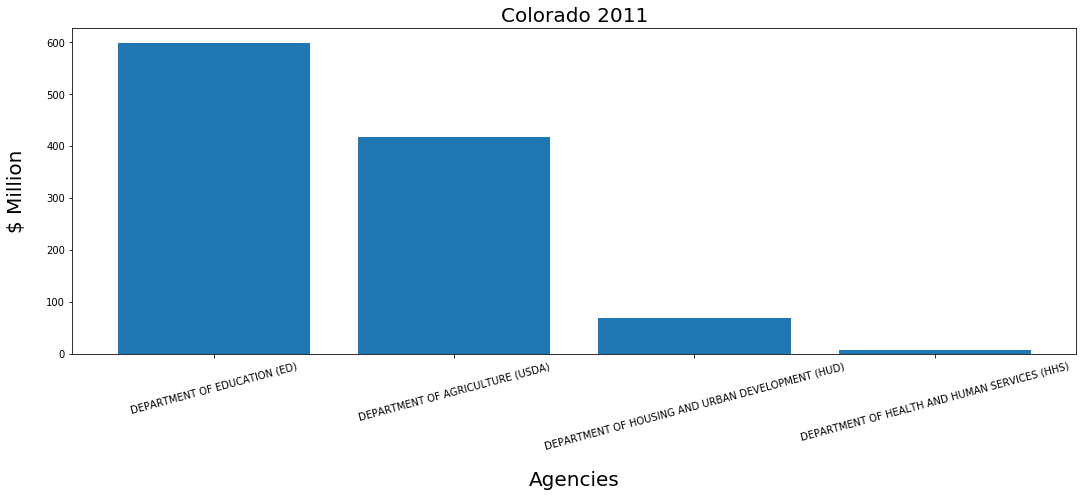

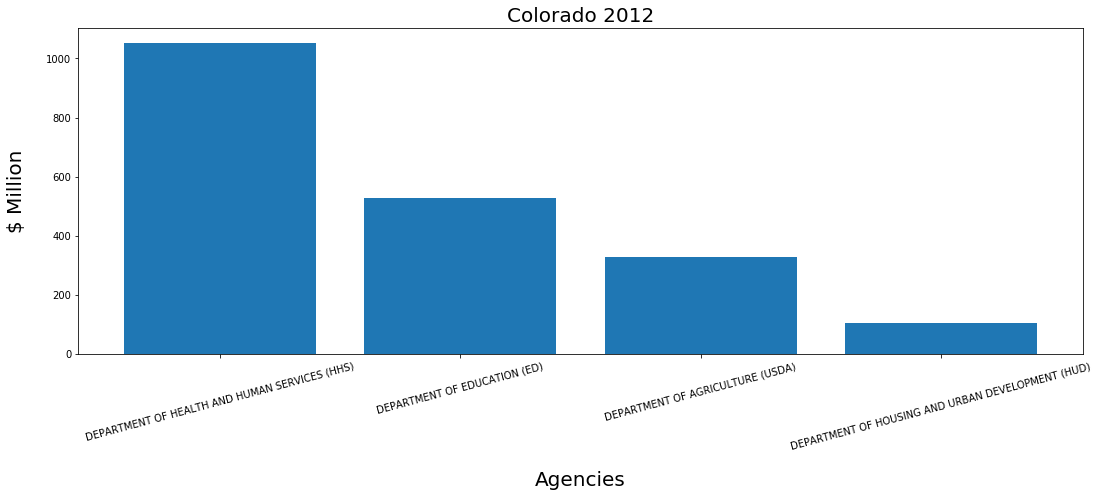

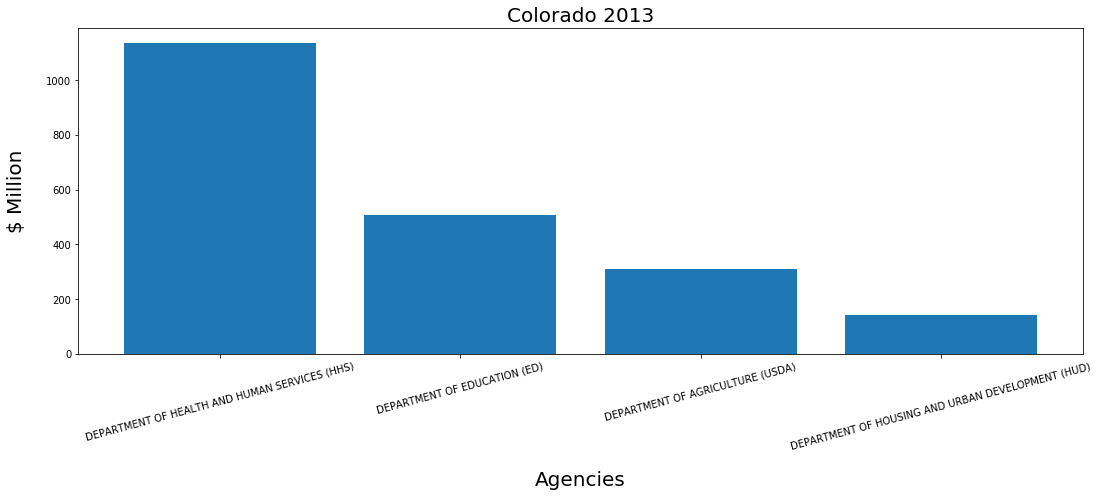

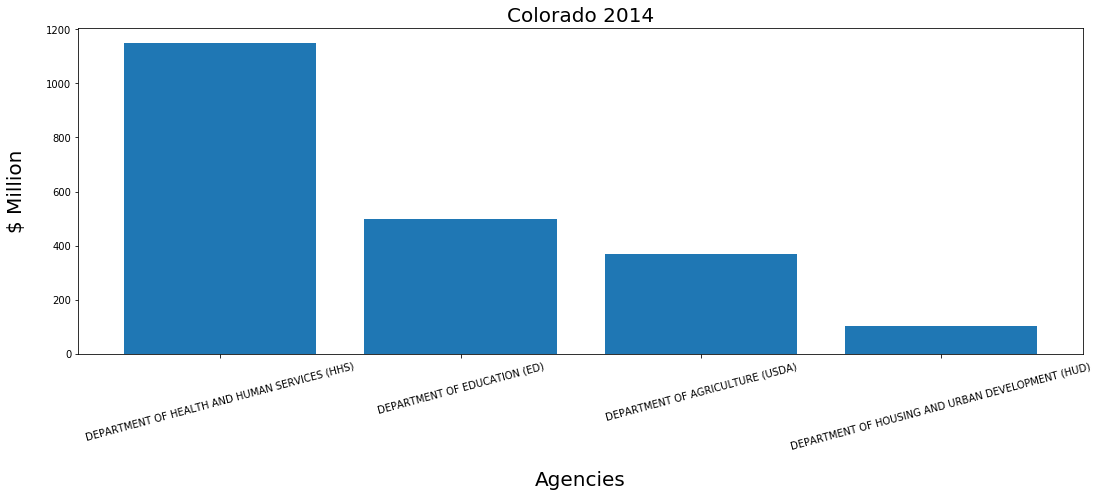

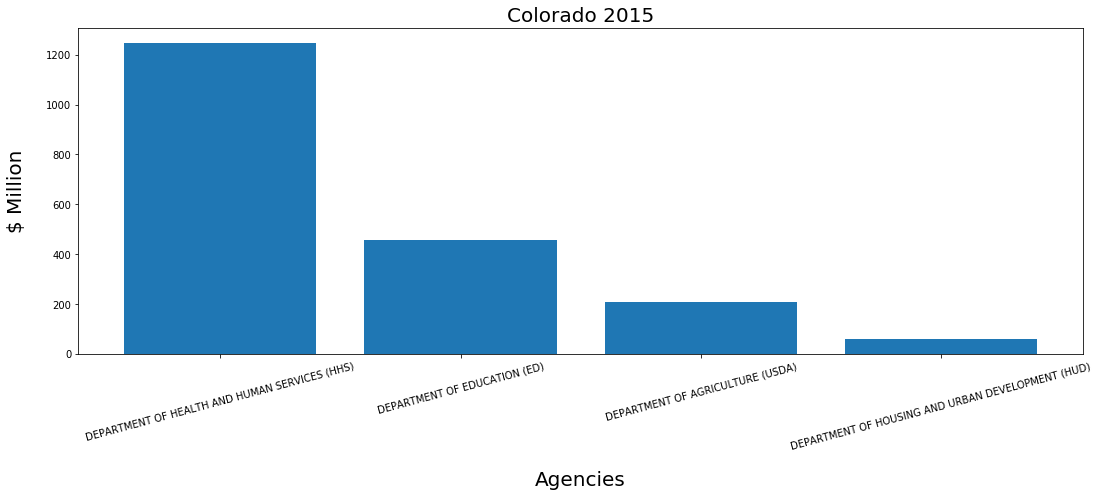

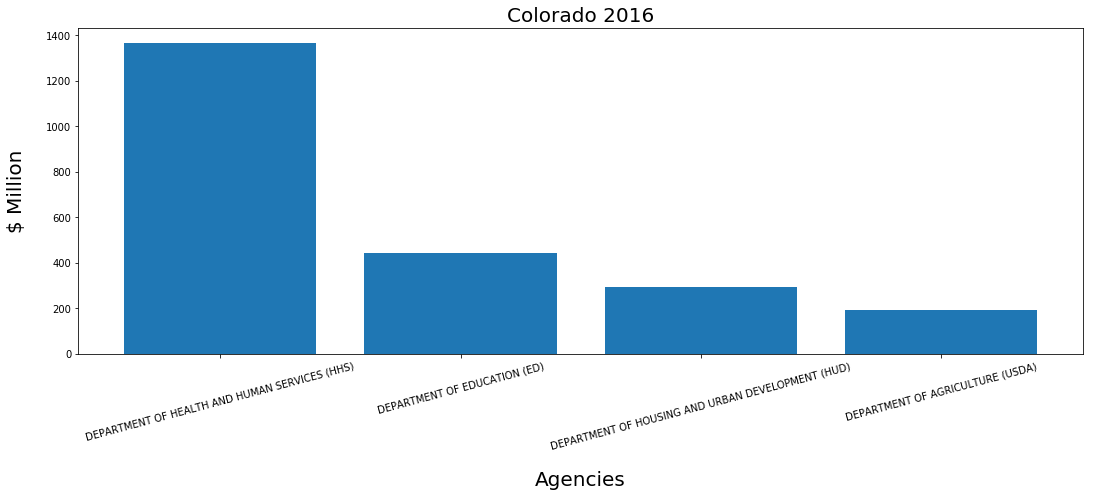

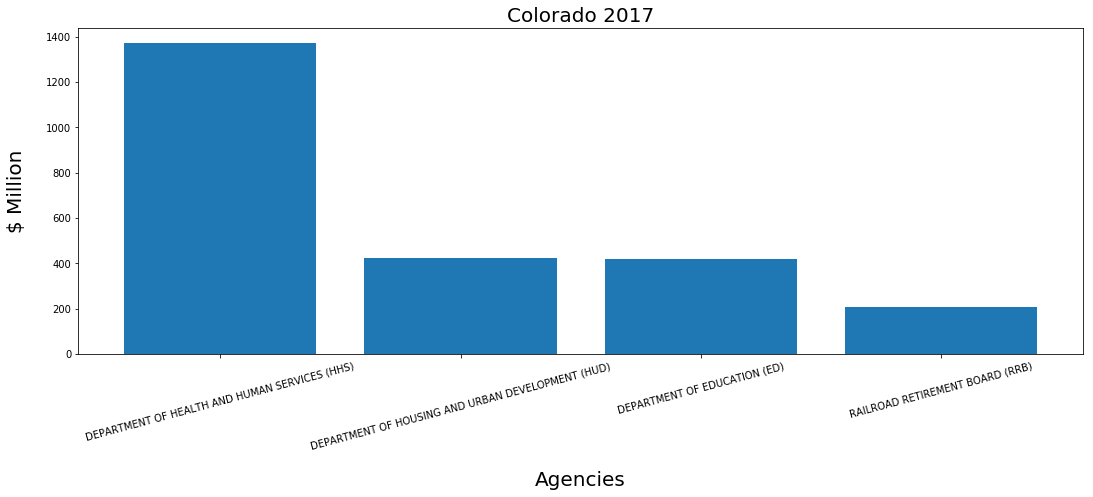

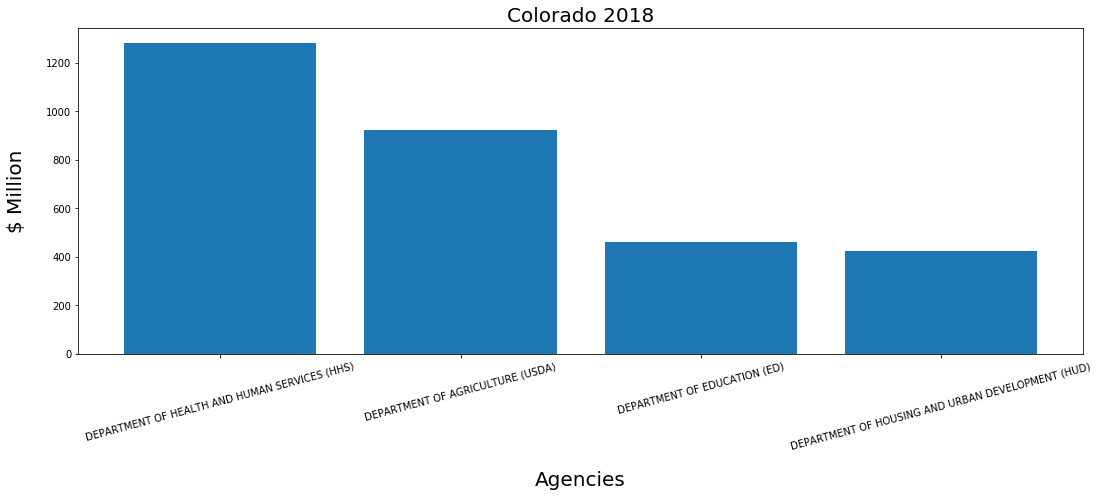

In [12]:
bar_graphs(converted_reduced_colorado, col, 'Colorado', 4, 'Agencies')

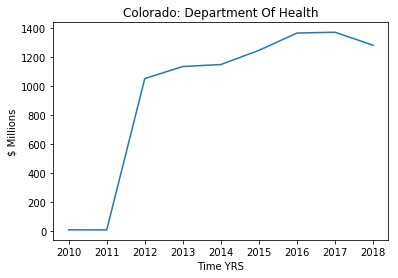

In [13]:
plot_line_costs(converted_reduced_colorado, 'Colorado', 'DEPARTMENT OF HEALTH', col)

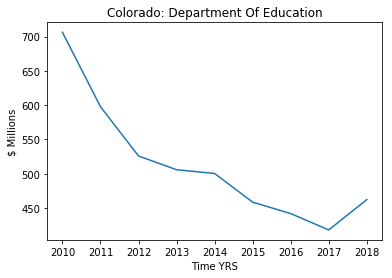

In [14]:
plot_line_costs(converted_reduced_colorado, 'Colorado', 'DEPARTMENT OF EDUCATION', col)

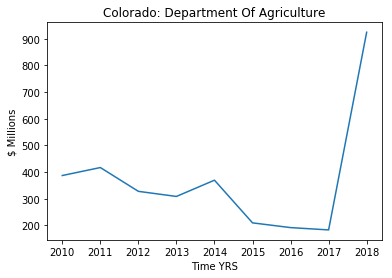

In [15]:
plot_line_costs(converted_reduced_colorado, 'Colorado', 'DEPARTMENT OF AGRICULTURE', col)

## Arizona Awarding Agencies

In [16]:
display((agency_arizona[1][1].head(3)))

,total_funding_amount,awarding_agency_name
0,533.0,DEPARTMENT OF AGRICULTURE (USDA)
1,443.0,DEPARTMENT OF AGRICULTURE (USDA)
2,1597.0,DEPARTMENT OF AGRICULTURE (USDA)


In [17]:
arizona_reduced = map_reduce(agency_arizona, col, col_money) 
converted_reduced_arizona = convert_notation(arizona_reduced, 'cost', col_money)

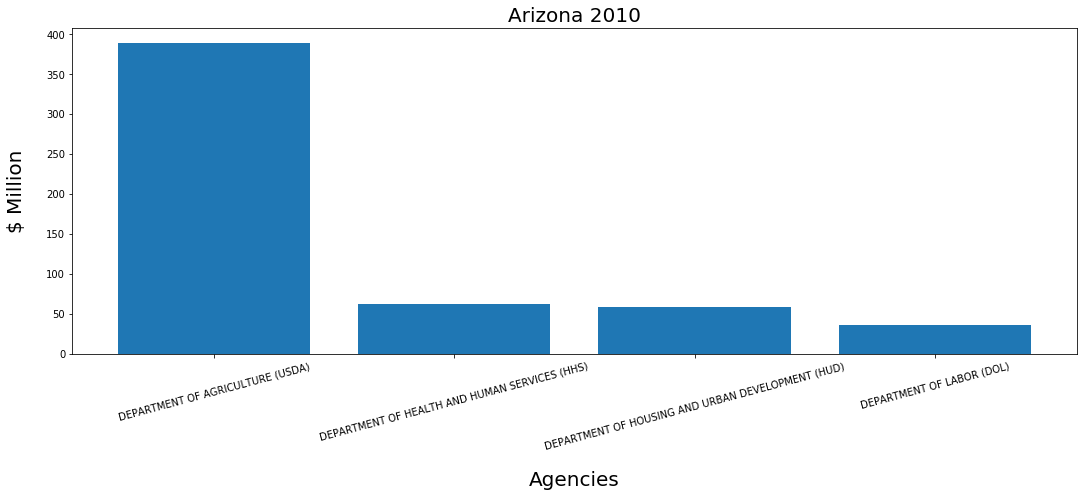

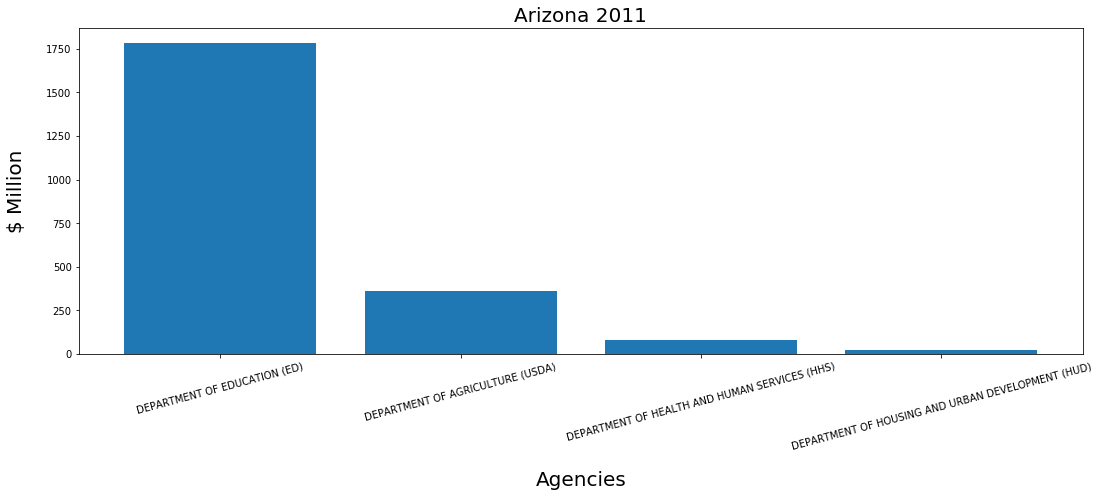

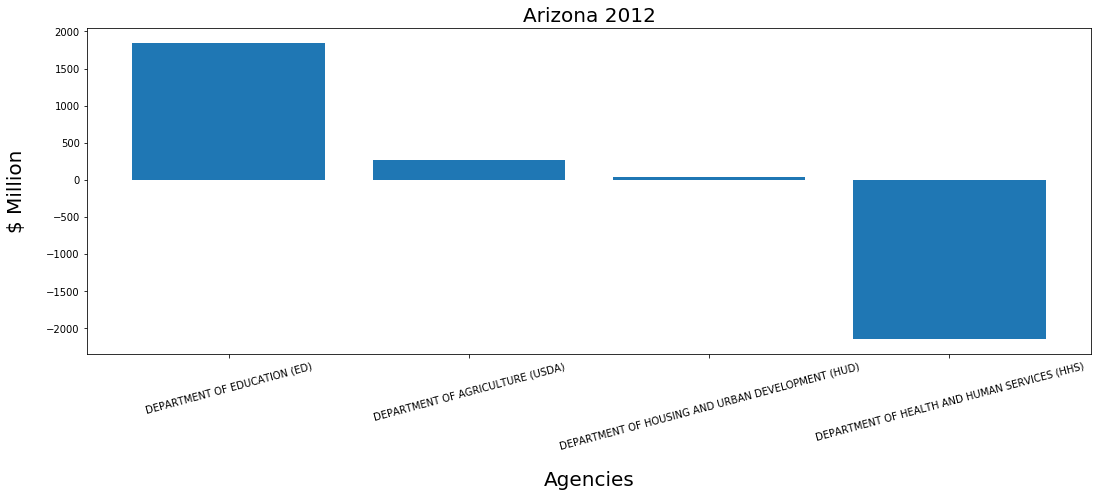

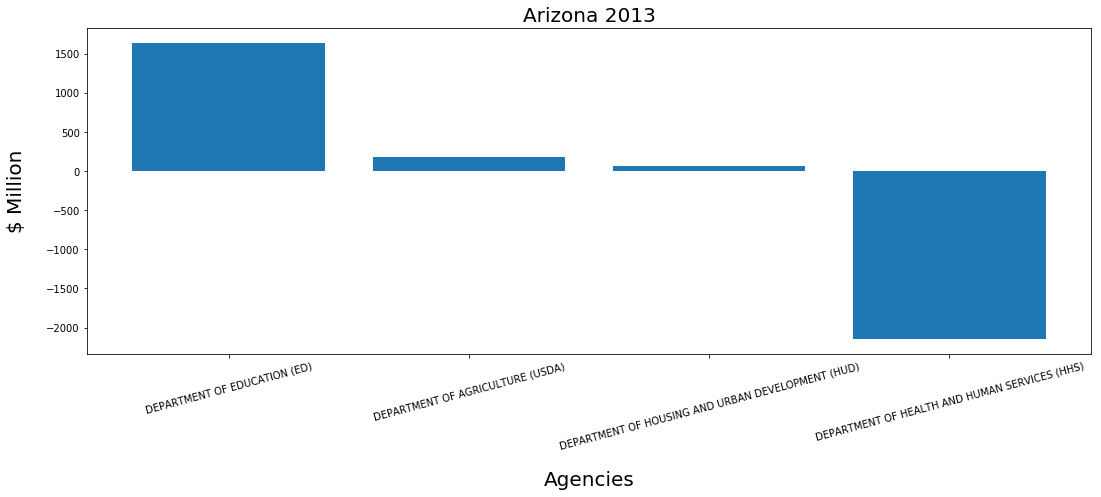

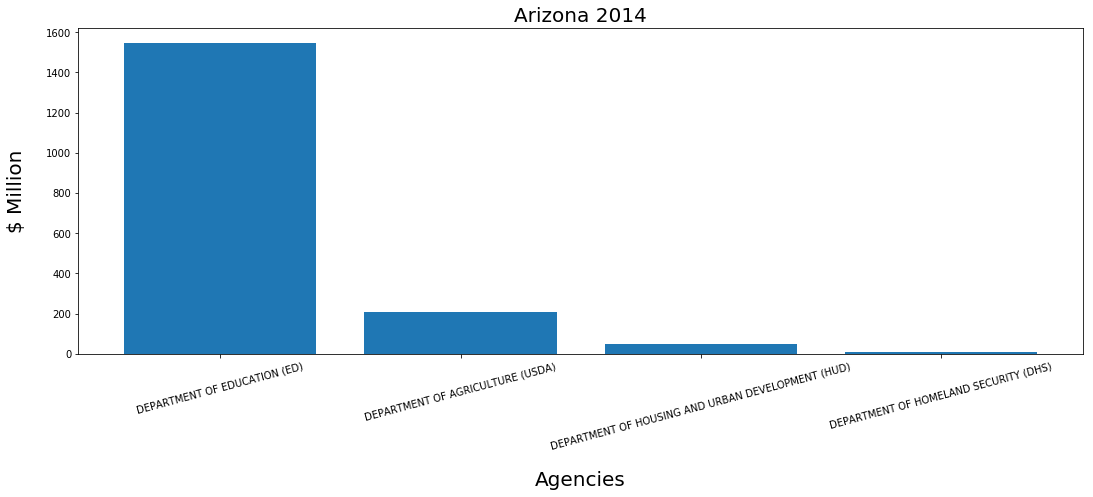

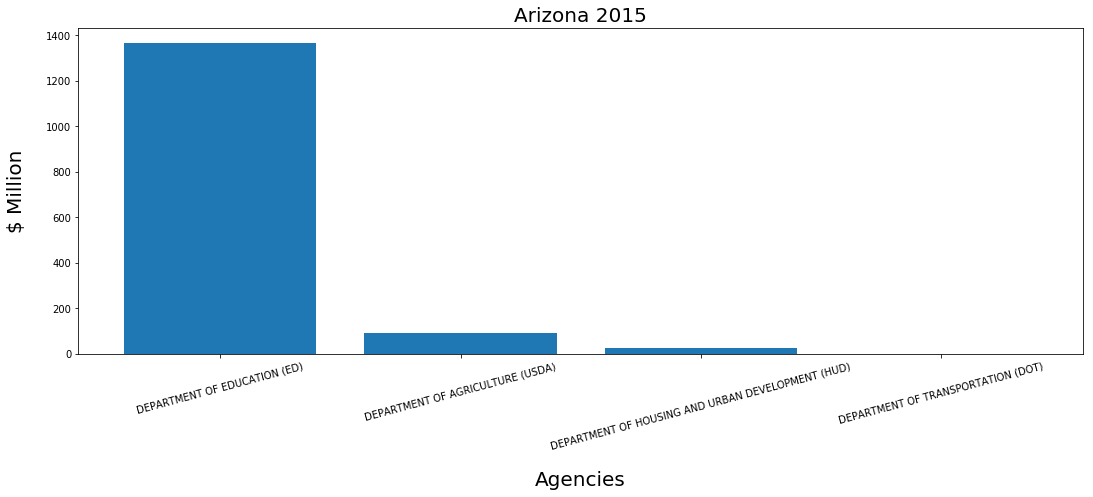

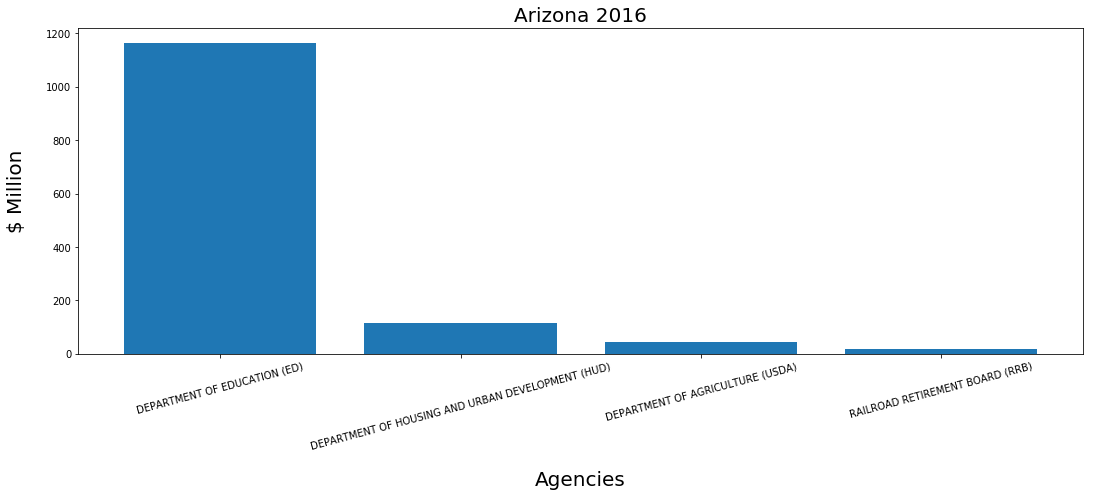

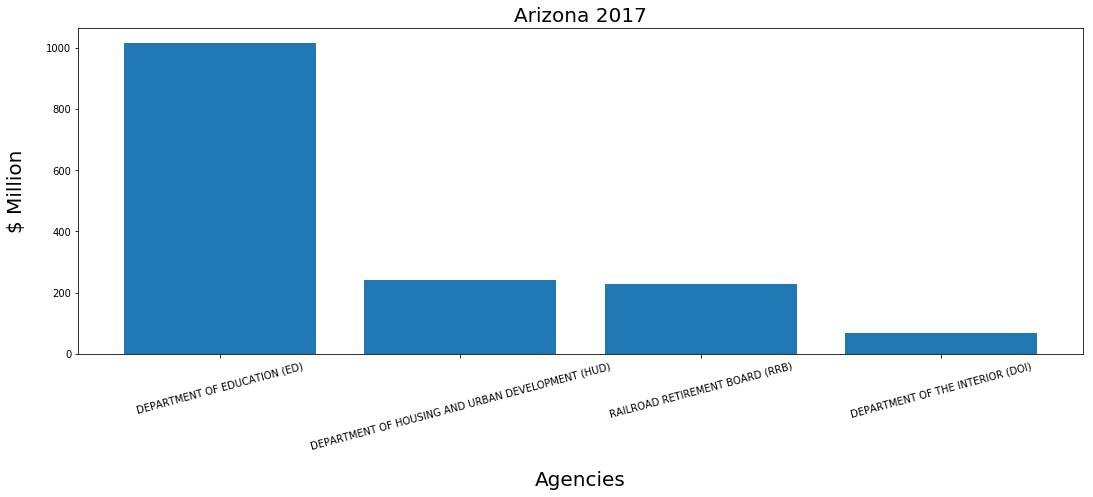

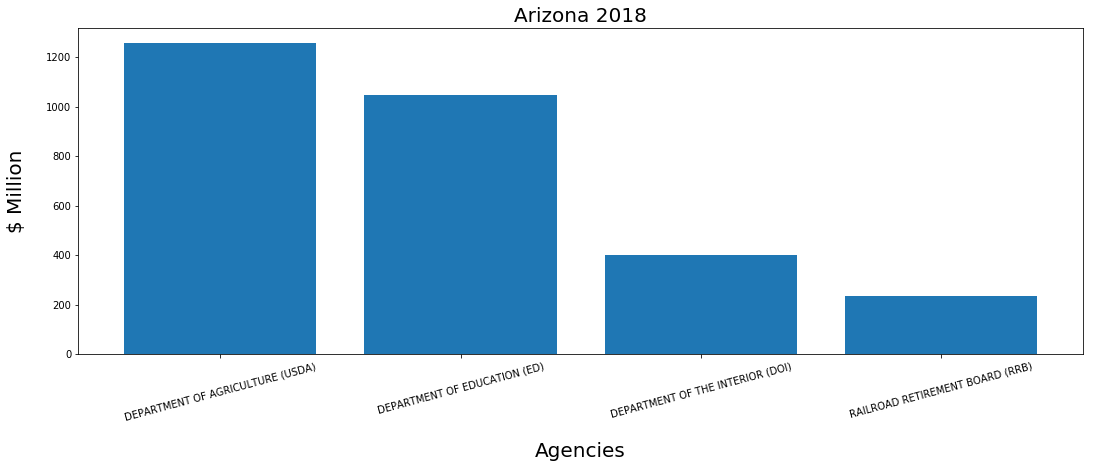

In [18]:
bar_graphs(converted_reduced_arizona, col, 'Arizona', 4, 'Agencies')

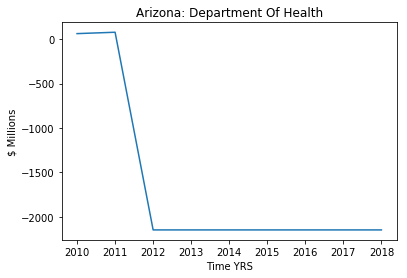

In [19]:
plot_line_costs(converted_reduced_arizona, 'Arizona', 'DEPARTMENT OF HEALTH', col)

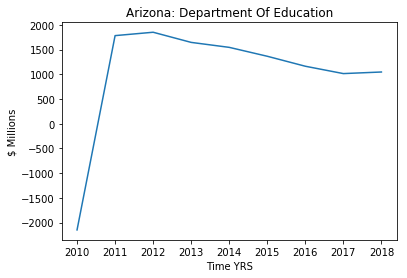

In [20]:
plot_line_costs(converted_reduced_arizona, 'Arizona', 'DEPARTMENT OF EDUCATION', col)

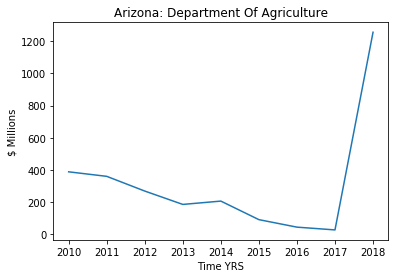

In [21]:
plot_line_costs(converted_reduced_arizona, 'Arizona', 'DEPARTMENT OF AGRICULTURE', col)

# Types of Awards

In [38]:
col_cfda = 'cfda_title'
col_money = 'total_funding_amount'

In [39]:
awards_colorado = sub_dfs(colorado_dfs, [col_money, col_cfda])
awards_arizona = sub_dfs(arizona_dfs, [col_money, col_cfda])

## Most Frequent Awards

In [40]:
print_frequent_items(awards_colorado, col_cfda)
print()
print_frequent_items(awards_arizona, col_cfda)

colorado 2010 :  FEDERAL PELL GRANT PROGRAM
colorado 2011 :  FEDERAL PELL GRANT PROGRAM
colorado 2012 :  FEDERAL PELL GRANT PROGRAM
colorado 2013 :  FEDERAL PELL GRANT PROGRAM
colorado 2014 :  FEDERAL PELL GRANT PROGRAM
colorado 2015 :  PELL
colorado 2016 :  PELL
colorado 2017 :  FEDERAL PELL GRANT PROGRAM
colorado 2018 :  PRICE LOSS COVERAGE

arizona 2010 :  FEDERAL PELL GRANT PROGRAM
arizona 2011 :  FEDERAL PELL GRANT PROGRAM
arizona 2012 :  FEDERAL PELL GRANT PROGRAM
arizona 2013 :  FEDERAL PELL GRANT PROGRAM
arizona 2014 :  FEDERAL PELL GRANT PROGRAM
arizona 2015 :  PELL
arizona 2016 :  PELL
arizona 2017 :  FEDERAL PELL GRANT PROGRAM
arizona 2018 :  FEDERAL PELL GRANT PROGRAM


## All Awards & Their Counts

In [41]:
co_awards_reduced = map_reduce(awards_colorado, col_cfda, col_money) 
converted_awards_colorado = convert_notation(co_awards_reduced, 'cost', col_money)

az_awards_reduced = map_reduce(awards_arizona, col_cfda, col_money) 
converted_awards_arizona = convert_notation(az_awards_reduced, 'cost', col_money)

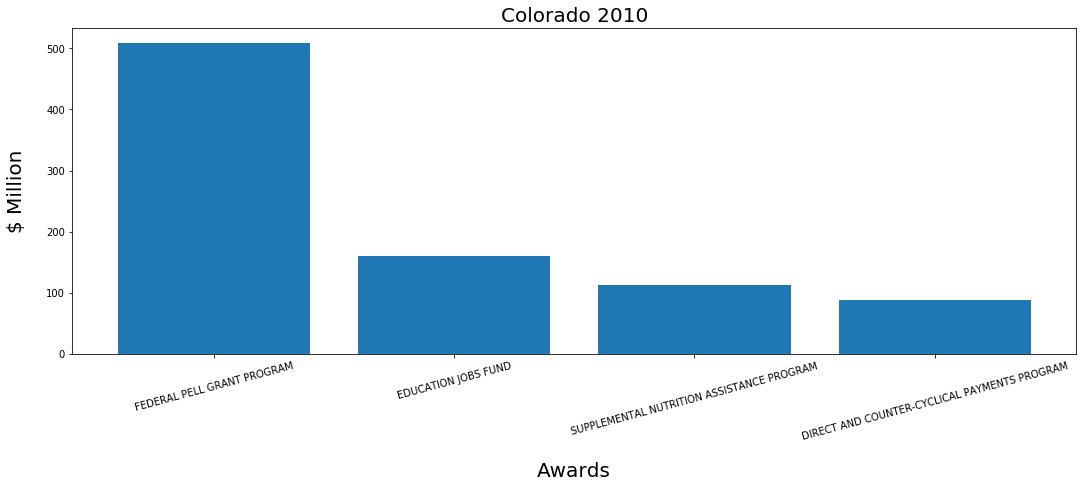

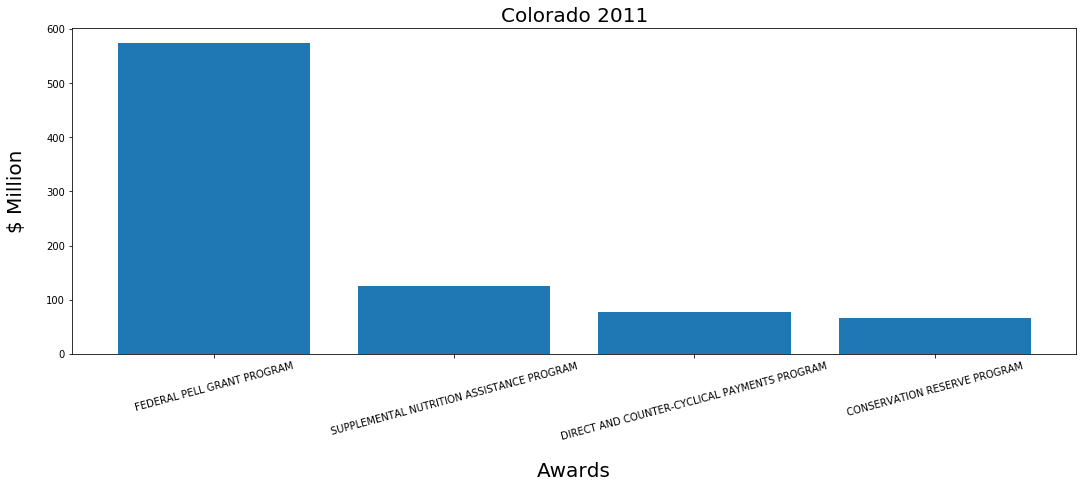

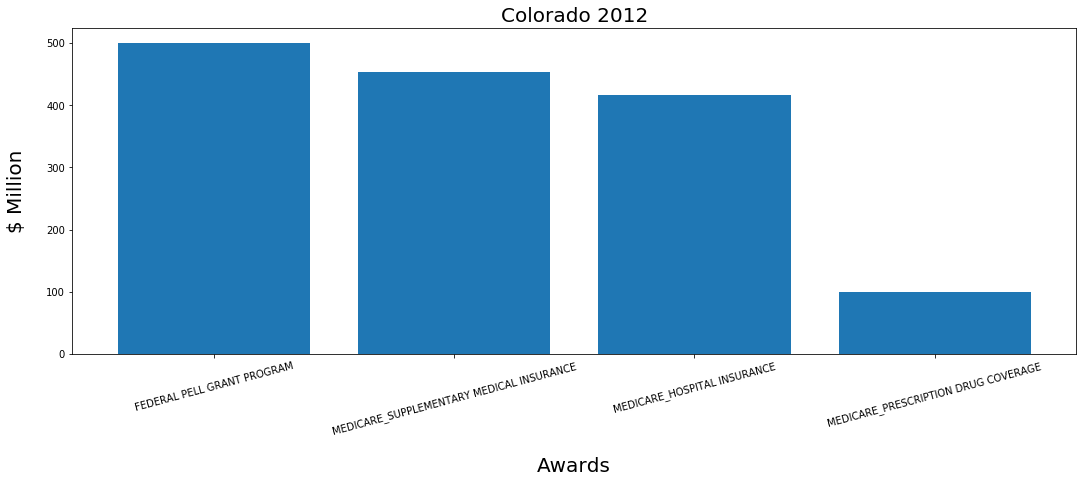

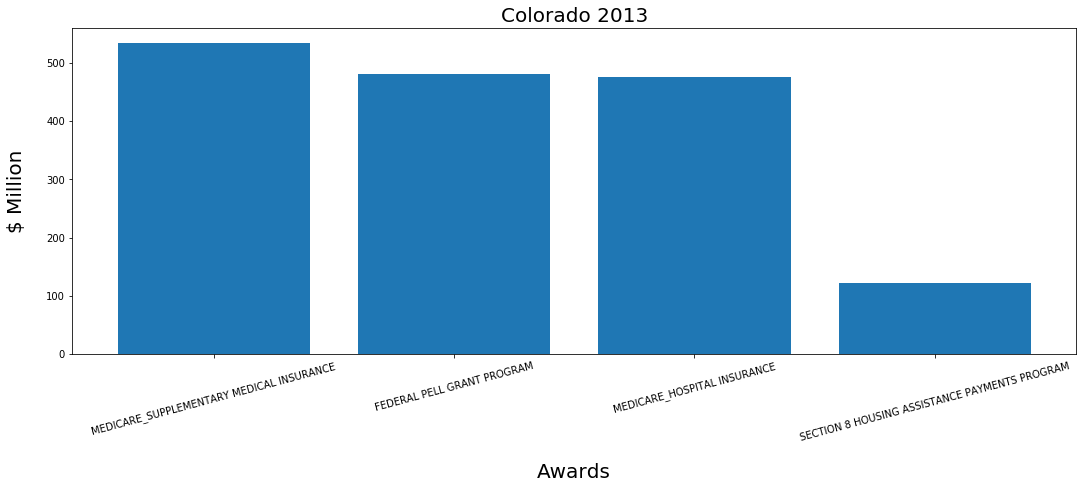

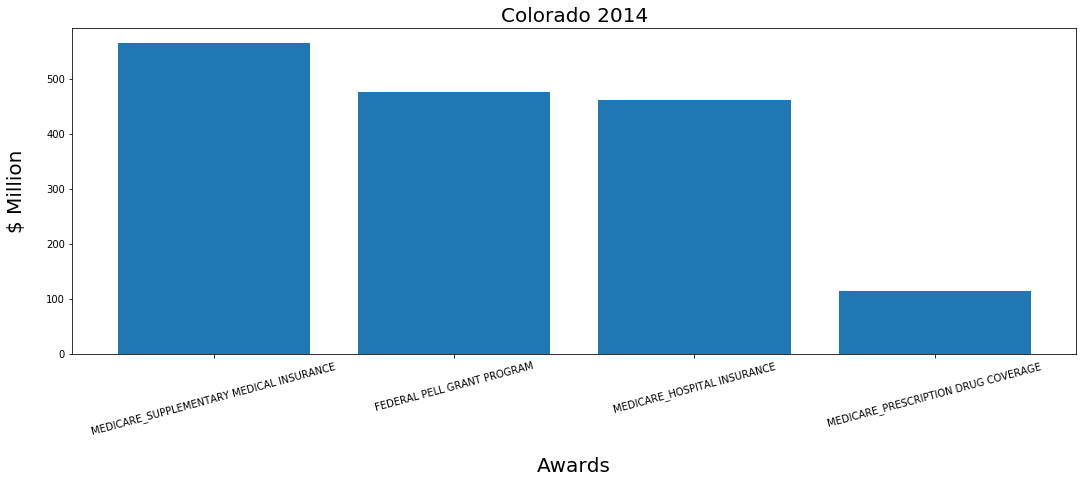

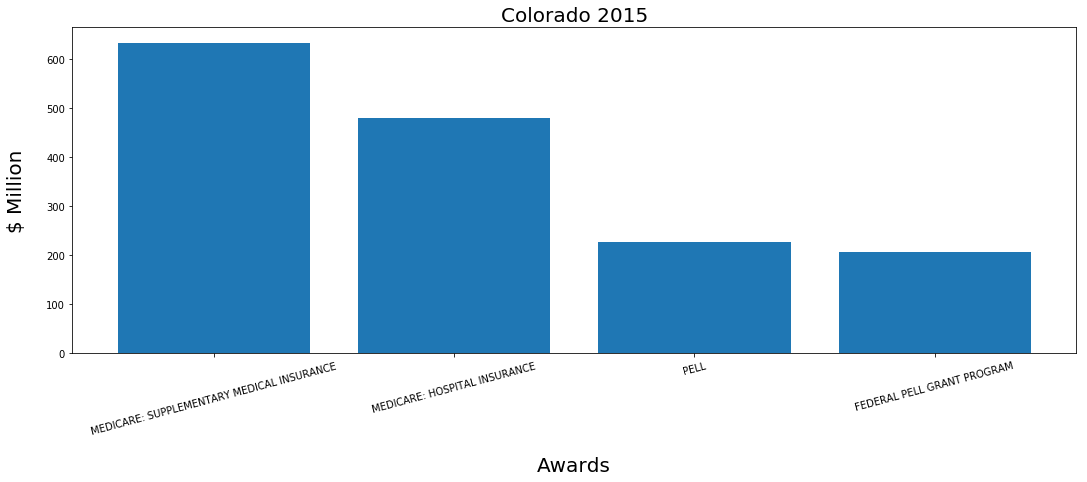

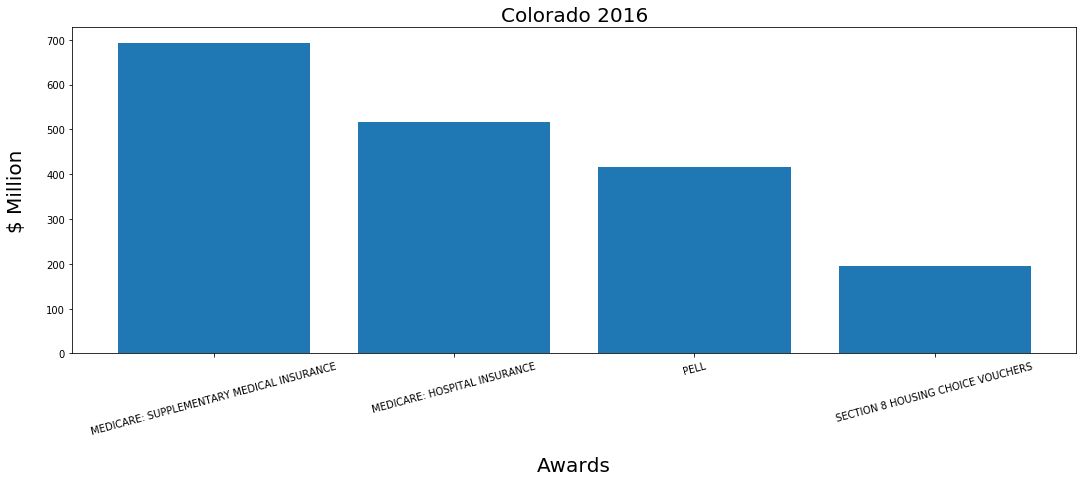

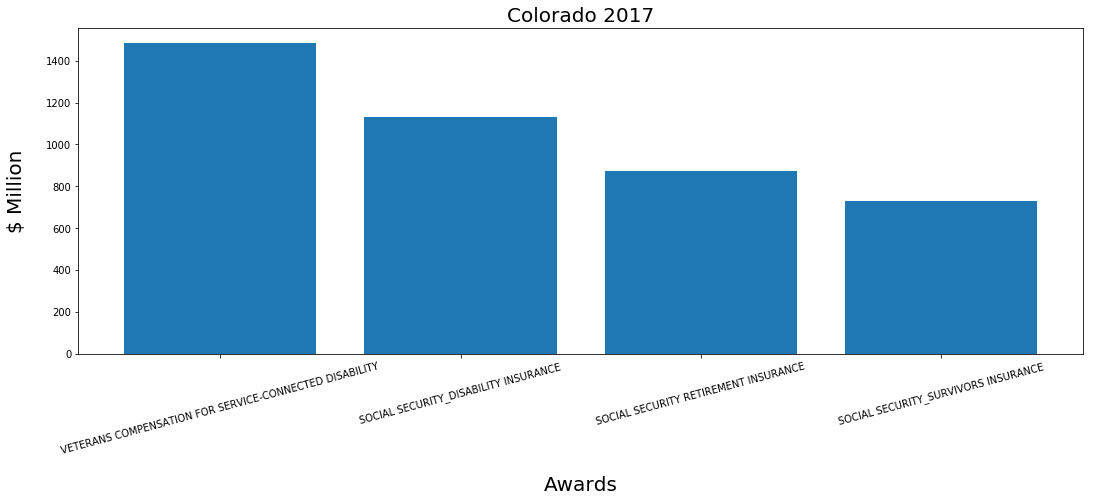

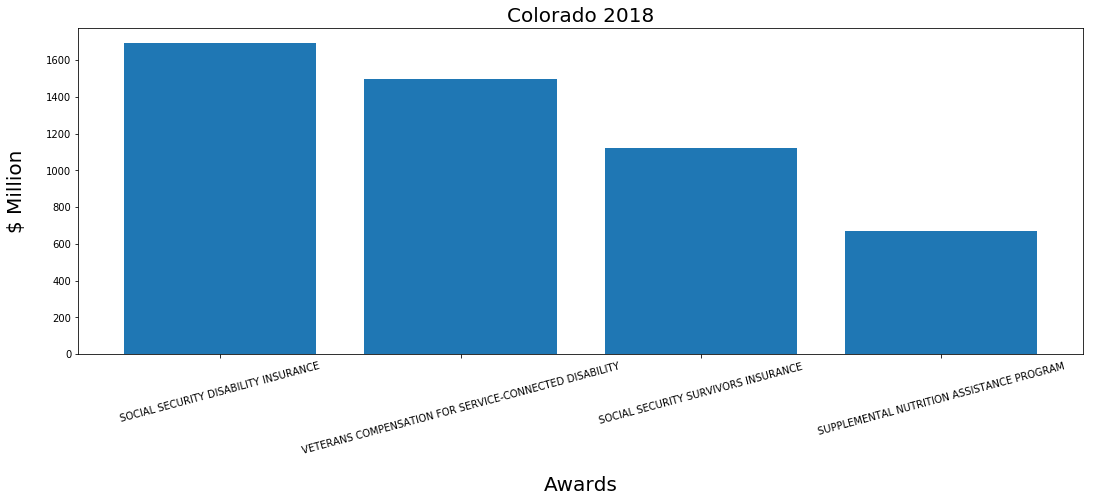

In [47]:
bar_graphs(converted_awards_colorado, col_cfda, 'Colorado', 4, 'Awards')

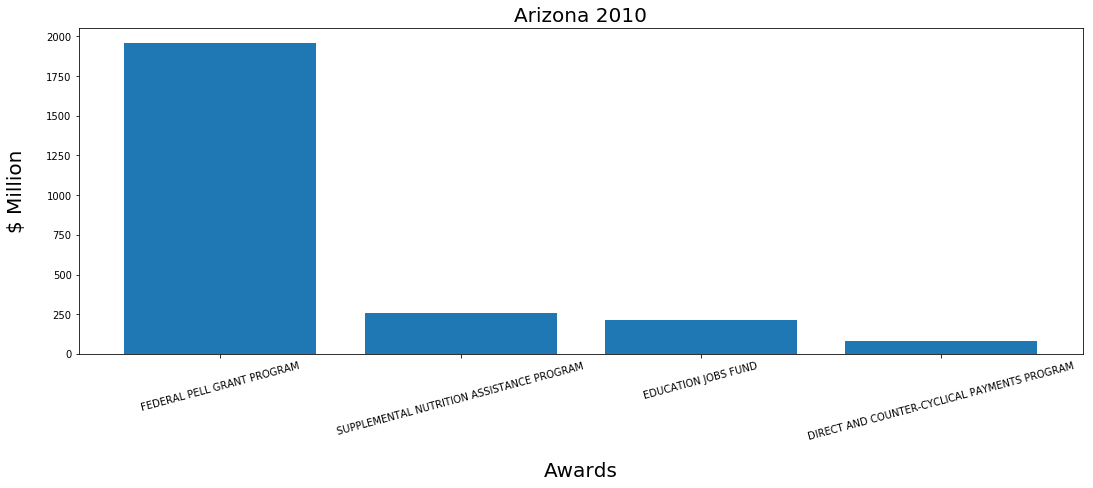

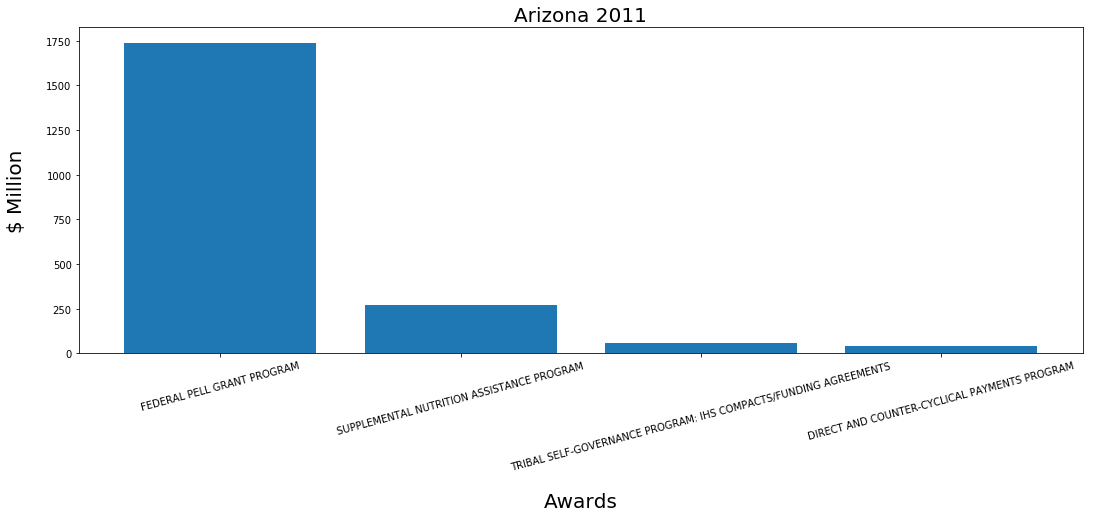

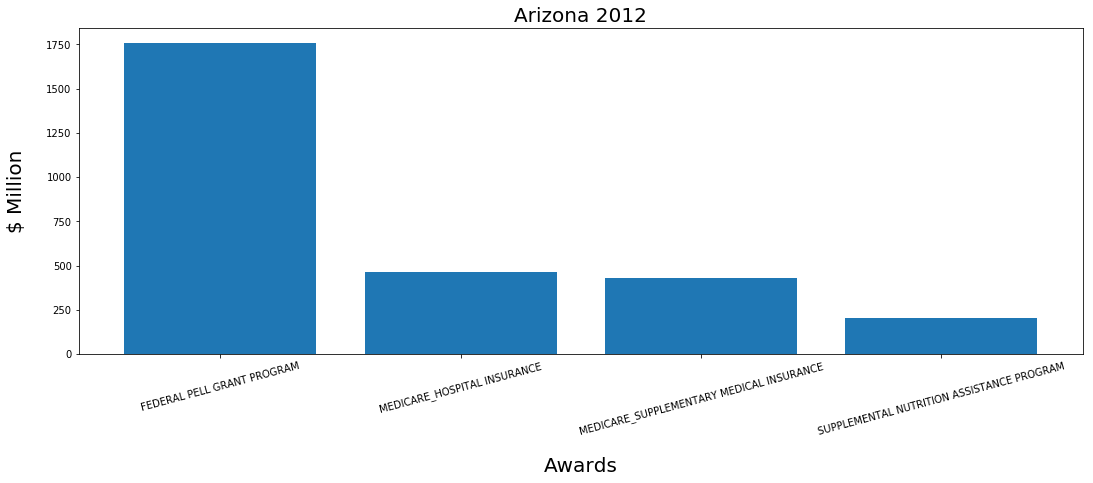

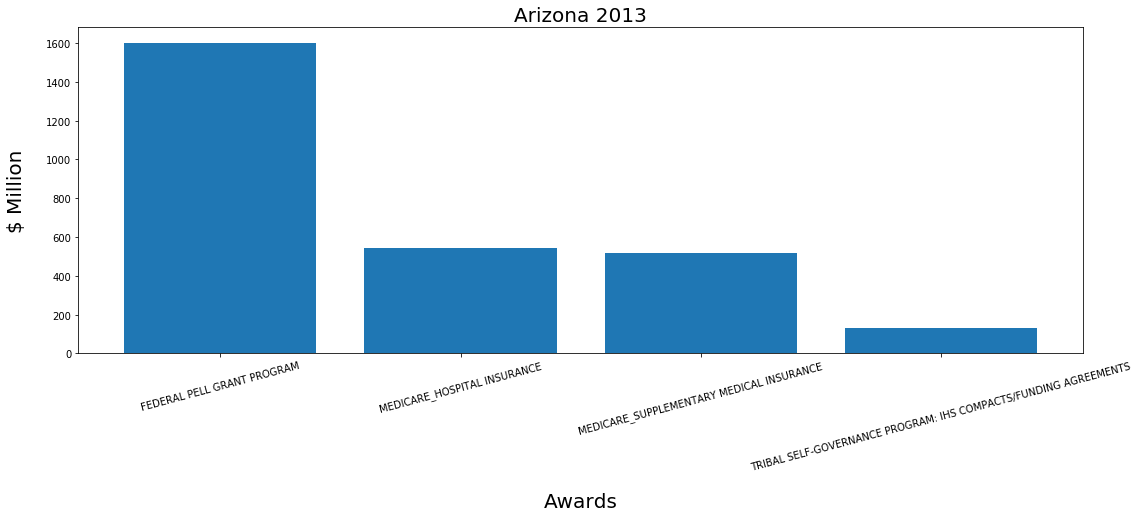

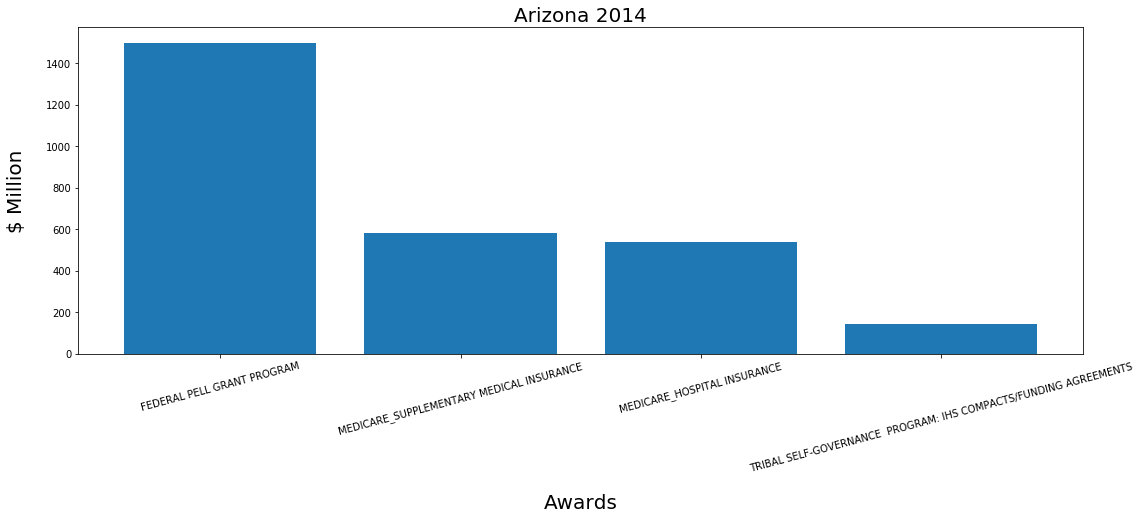

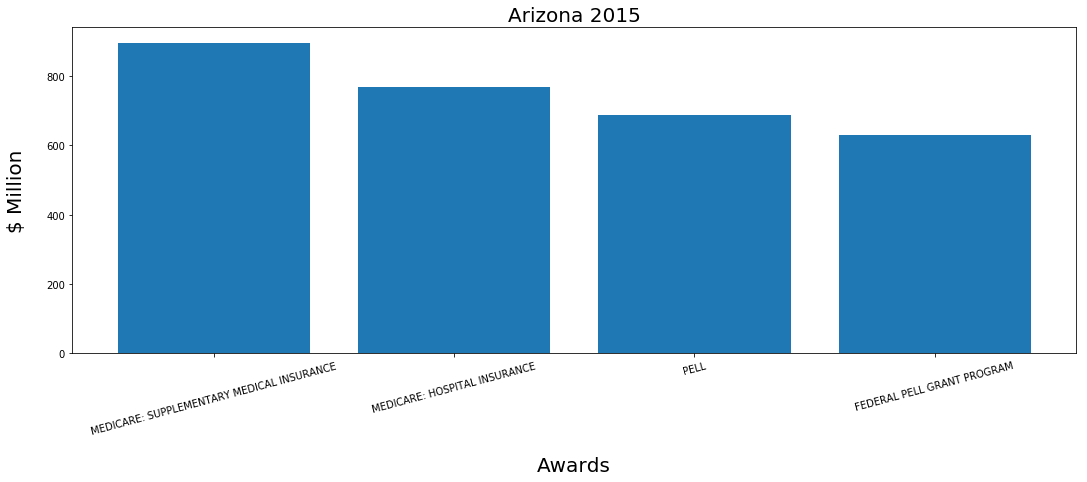

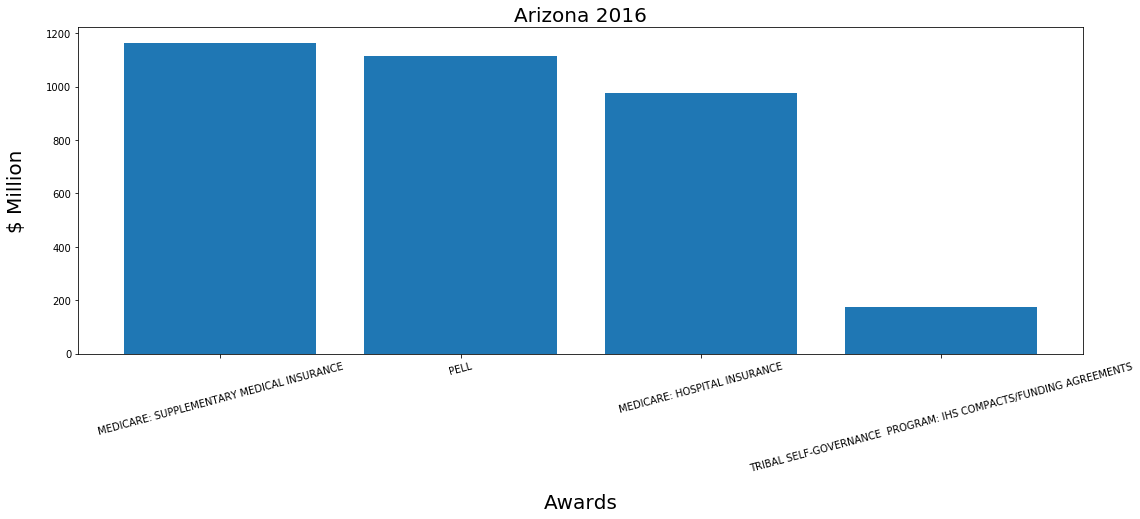

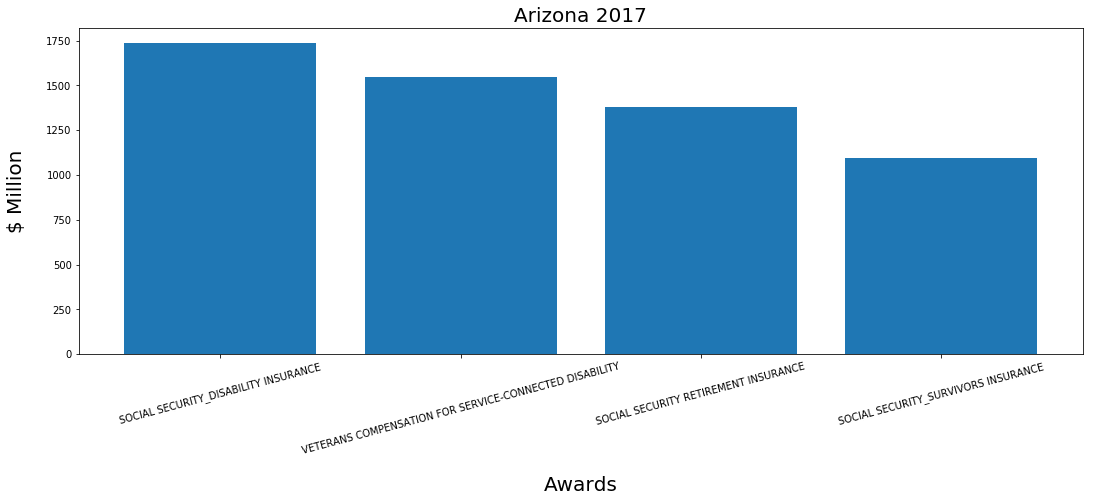

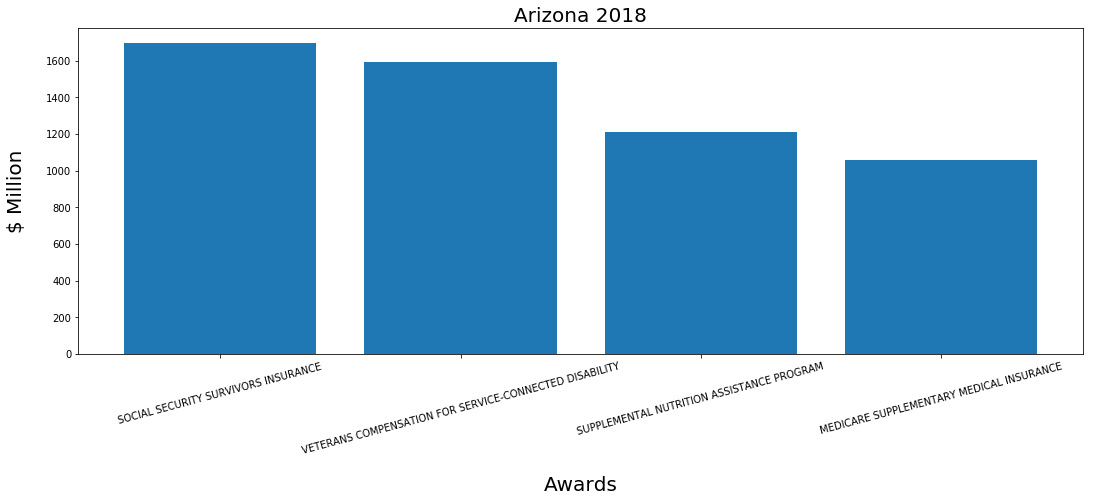

In [49]:
bar_graphs(converted_awards_arizona, col_cfda, 'Arizona', 4, 'Awards')

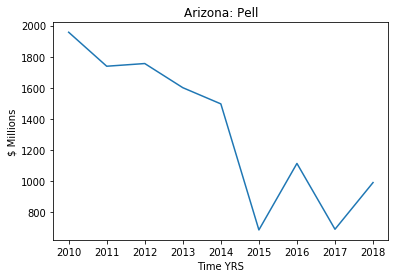

In [45]:
plot_line_costs(converted_awards_arizona, 'Arizona', 'PELL', col_cfda)

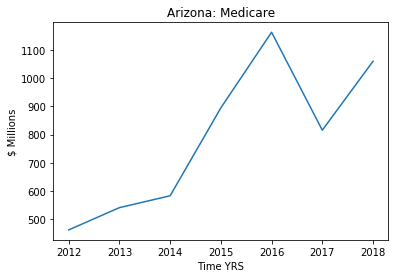

In [54]:
plot_line_costs(converted_awards_arizona[2:], 'Arizona', 'MEDICARE', col_cfda)

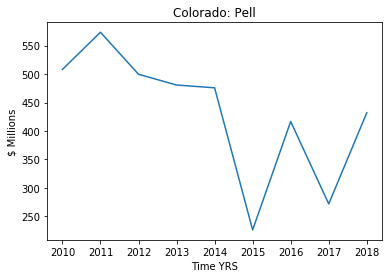

In [46]:
plot_line_costs(converted_awards_colorado, 'Colorado', 'PELL', col_cfda)

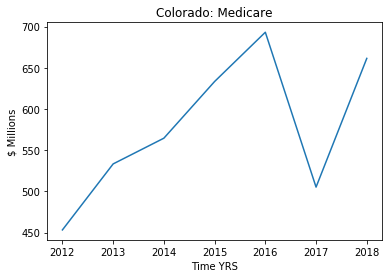

In [55]:
plot_line_costs(converted_awards_colorado[2:], 'Colorado', 'MEDICARE', col_cfda)

## Find The Most Frequent Awards & Their Counts

### Arizona

In [56]:
output_dfs(awards_arizona, col_cfda, 7)

,1,2,3,4,5,6,7
2010,"(Federal Pell Grant Program, 24568)","(Direct And Counter-Cyclical Payments Program, 7934)","(Academic Competitiveness Grants, 1737)","(Conservation Reserve Program, 1259)","(Teacher Education Assistance For College And Higher Education Grants (Teach Grants), 925)","(National Science And Mathematics Access To Retain Talent (Smart) Grants, 777)","(Section 8 Housing Choice Vouchers, 388)"
2011,"(Federal Pell Grant Program, 16369)","(Direct And Counter-Cyclical Payments Program, 5580)","(Conservation Reserve Program, 1138)","(Indian Health Service_Health Management Development Program, 420)","(Teacher Education Assistance For College And Higher Education Grants (Teach Grants), 297)","(Supplemental Revenue Assistance Program, 236)","(Livestock Forage Disaster Program, 226)"
2012,"(Federal Pell Grant Program, 11560)","(Direct And Counter-Cyclical Payments Program, 2359)","(Conservation Reserve Program, 1247)","(Teacher Education Assistance For College And Higher Education Grants (Teach Grants), 229)","(Section 8 Housing Assistance Payments Program, 214)","(Indian Self-Determination, 133)","(Crop Disaster Program, 109)"
2013,"(Federal Pell Grant Program, 12031)","(Direct And Counter-Cyclical Payments Program, 2256)","(Conservation Reserve Program, 1196)","(Section 8 Housing Assistance Payments Program, 508)","(Teacher Education Assistance For College And Higher Education Grants (Teach Grants), 453)","(Supplemental Revenue Assistance Program, 205)","(Indian Self-Determination, 143)"
2014,"(Federal Pell Grant Program, 12326)","(Direct And Counter-Cyclical Payments Program, 2301)","(Conservation Reserve Program, 1238)","(Teacher Education Assistance For College And Higher Education Grants (Teach Grants), 458)","(Section 8 Housing Assistance Payments Program, 320)","(Livestock Forage Program-2014 Farm Bill, 215)","(Indian Self-Determination, 154)"
2015,"(Pell, 6726)","(Federal Pell Grant Program, 4118)","(Cotton Transition Assistance Program, 1235)","(Conservation Reserve Program, 1212)","(Commodity Loans And Loan Deficiency Payments, 814)","(Livestock Forage Program-2014 Farm Bill, 652)","(Teacher Education Assistance For College And Higher Education Grants (Teac, 245)"
2016,"(Pell, 11847)","(Conservation Reserve Program, 1152)","(Agriculture Risk Coverage Program, 694)","(Commodity Loans And Loan Deficiency Payments, 594)","(Teacher Education Assistance For College And Higher Education Grants (Teac, 445)","(Section 8 Housing Assistance Payments Program, 222)","(Section 8 Housing Choice Vouchers, 215)"
2017,"(Federal Pell Grant Program, 8884)","(Pell, 3184)","(Social Insurance For Railroad Workers, 635)","(Price Loss Coverage, 583)","(Section 8 Housing Assistance Payments Program, 556)","(Section 8 Housing Choice Vouchers, 402)","(Conservation Reserve Program, 394)"
2018,"(Federal Pell Grant Program, 12564)","(Livestock Forage Program-2014 Farm Bill, 1982)","(Price Loss Coverage, 1217)","(Social Insurance For Railroad Workers, 646)","(Section 8 Housing Assistance Payments Program, 559)","(Section 8 Housing Choice Vouchers, 553)","(Social Security Retirement Insurance, 456)"


### Colorado

In [58]:
output_dfs(awards_colorado, col_cfda, 7)

,1,2,3,4,5,6,7
2010,"(Federal Pell Grant Program, 19668)","(Direct And Counter-Cyclical Payments Program, 13030)","(Conservation Reserve Program, 5225)","(Academic Competitiveness Grants, 3274)","(National Science And Mathematics Access To Retain Talent (Smart) Grants, 1751)","(Supplemental Revenue Assistance Program, 1532)","(Section 8 Housing Choice Vouchers, 601)"
2011,"(Federal Pell Grant Program, 15724)","(Direct And Counter-Cyclical Payments Program, 13225)","(Conservation Reserve Program, 5224)","(Supplemental Revenue Assistance Program, 1459)","(Environmental Quality Incentives Program, 782)","(Section 8 Housing Assistance Payments Program, 422)","(Crop Disaster Program, 285)"
2012,"(Federal Pell Grant Program, 10201)","(Direct And Counter-Cyclical Payments Program, 7272)","(Conservation Reserve Program, 5645)","(Conservation Stewardship Program, 764)","(Crop Disaster Program, 538)","(Section 8 Housing Assistance Payments Program, 490)","(Environmental Quality Incentives Program, 376)"
2013,"(Federal Pell Grant Program, 10500)","(Direct And Counter-Cyclical Payments Program, 7741)","(Conservation Reserve Program, 5328)","(Section 8 Housing Assistance Payments Program, 1104)","(Crop Disaster Program, 886)","(Supplemental Revenue Assistance Program, 818)","(Milk Income Loss Contract Program, 209)"
2014,"(Federal Pell Grant Program, 10340)","(Direct And Counter-Cyclical Payments Program, 7305)","(Conservation Reserve Program, 4939)","(Livestock Forage Program-2014 Farm Bill, 1028)","(Section 8 Housing Assistance Payments Program, 654)","(Crop Disaster Program, 552)","(Teacher Education Assistance For College And Higher Education Grants (Teach Grants), 161)"
2015,"(Pell, 6239)","(Conservation Reserve Program, 4829)","(Federal Pell Grant Program, 3977)","(Livestock Forage Program-2014 Farm Bill, 1727)","(Noninsured Assistance, 408)","(Section 8 Housing Assistance Payments Program, 344)","(Direct And Counter-Cyclical Payments Program, 313)"
2016,"(Pell, 9552)","(Conservation Reserve Program, 4669)","(Agriculture Risk Coverage Program, 4227)","(Commodity Loans And Loan Deficiency Payments, 597)","(Section 8 Housing Assistance Payments Program, 528)","(Section 8 Housing Choice Vouchers, 439)","(Noninsured Assistance, 181)"
2017,"(Federal Pell Grant Program, 6778)","(Conservation Reserve Program, 4606)","(Price Loss Coverage, 2979)","(Pell, 2510)","(Agriculture Risk Coverage Program, 2260)","(Social Insurance For Railroad Workers, 2061)","(Commodity Loans And Loan Deficiency Payments, 1318)"
2018,"(Price Loss Coverage, 27340)","(Conservation Reserve Program, 17582)","(Federal Pell Grant Program, 9628)","(Social Insurance For Railroad Workers, 2247)","(Livestock Forage Program-2014 Farm Bill, 1537)","(Section 8 Housing Assistance Payments Program, 1329)","(Social Security Retirement Insurance, 1270)"


# Link Awards w/ Agencies

In [59]:
col_one = 'cfda_title'
col_two = 'awarding_sub_agency_name'

co_aw_ag = sub_dfs(colorado_dfs, [col_two, col_one])
az_aw_ag = sub_dfs(arizona_dfs, [col_two, col_one])

In [60]:
co_aw_ag_mp = map_reduce(co_aw_ag, col_one, col_two)
az_aw_ag_mp = map_reduce(az_aw_ag, col_one, col_two)

In [61]:
print(co_aw_ag_mp[8].name.title())
display(co_aw_ag_mp[8].head(5))
print()
print()
print(az_aw_ag_mp[8].name.title())
display(az_aw_ag_mp[8].head(5))

Colorado 2018


,cfda_title,awarding_sub_agency_name,Count
0,AGRICULTURE ON INDIAN LANDS,BUREAU OF INDIAN AFFAIRS AND BUREAU OF INDIAN EDUCATION,5
1,AGRICULTURE RISK COVERAGE PROGRAM,FARM SERVICE AGENCY,68
2,AID TO TRIBAL GOVERNMENTS,BUREAU OF INDIAN AFFAIRS AND BUREAU OF INDIAN EDUCATION,4
3,ALL-VOLUNTEER FORCE EDUCATIONAL ASSISTANCE,UNDER SECRETARY FOR BENEFITS/VETERANS BENEFITS ADMINISTRATION,193
4,AUTOMOBILES AND ADAPTIVE EQUIPMENT FOR CERTAIN DISABLED VETERANS AND MEMBERS OF THE ARMED FORCES,UNDER SECRETARY FOR BENEFITS/VETERANS BENEFITS ADMINISTRATION,100




Arizona 2018


,cfda_title,awarding_sub_agency_name,Count
0,ADMINISTRATIVE COST GRANTS FOR INDIAN SCHOOLS,BUREAU OF INDIAN AFFAIRS AND BUREAU OF INDIAN EDUCATION,34
1,AGRICULTURE ON INDIAN LANDS,BUREAU OF INDIAN AFFAIRS AND BUREAU OF INDIAN EDUCATION,60
2,AGRICULTURE RISK COVERAGE PROGRAM,FARM SERVICE AGENCY,1
3,AID TO TRIBAL GOVERNMENTS,BUREAU OF INDIAN AFFAIRS AND BUREAU OF INDIAN EDUCATION,21
4,ALL-VOLUNTEER FORCE EDUCATIONAL ASSISTANCE,UNDER SECRETARY FOR BENEFITS/VETERANS BENEFITS ADMINISTRATION,129


In [64]:
co_education = find_dfs(co_aw_ag_mp, col_two, 'DEPARTMENT OF EDUCATION')
az_education = find_dfs(az_aw_ag_mp, col_two, 'DEPARTMENT OF EDUCATION')

In [66]:
co_health = find_dfs(co_aw_ag_mp, col_one, 'HEALTH')
az_health = find_dfs(az_aw_ag_mp, col_one, 'HEALTH')

# Health Awards

In [67]:
for df in co_health:
    print(df.name)
    display(df)

colorado 2010


,cfda_title,awarding_sub_agency_name,Count


colorado 2011


,cfda_title,awarding_sub_agency_name,Count
19,HEALTHY FORESTS RESERVE PROGRAM (HFRP),NATURAL RESOURCES CONSERVATION SERVICE,8


colorado 2012


,cfda_title,awarding_sub_agency_name,Count
17,HEALTHY FORESTS RESERVE PROGRAM (HFRP),NATURAL RESOURCES CONSERVATION SERVICE,1
29,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,45


colorado 2013


,cfda_title,awarding_sub_agency_name,Count
4,DISADVANTAGED HEALTH PROFESSIONS FACULTY LOAN REPAYMENT PROGRAM (FLRP),HEALTH RESOURCES AND SERVICES ADMINISTRATION,1
23,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,46


colorado 2014


,cfda_title,awarding_sub_agency_name,Count
6,DISADVANTAGED HEALTH PROFESSIONS FACULTY LOAN REPAYMENT PROGRAM (FLRP),HEALTH RESOURCES AND SERVICES ADMINISTRATION,1
27,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,45
30,NIH LOAN REPAYMENT PROGRAM FOR HEALTH DISPARITIES RESEARCH (LRP-HDR),NATIONAL INSTITUTES OF HEALTH,3


colorado 2015


,cfda_title,awarding_sub_agency_name,Count
6,DISADVANTAGED HEALTH PROFESSIONS FACULTY LOAN REPAYMENT PROGRAM (FLRP),HEALTH RESOURCES AND SERVICES ADMINISTRATION,1
27,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,48


colorado 2016


,cfda_title,awarding_sub_agency_name,Count
29,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,51
30,NATIONAL INSTITUTE ON MINORITY HEALTH AND HEALTH DISPARITIES (NIMHD) EXTRAMURAL LOAN REPAYMENT P...,NATIONAL INSTITUTES OF HEALTH,1
31,NATIONAL INSTITUTES OF HEALTH LOAN REPAYMENT PROGRAM FOR CLINICAL RESEARCHERS,NATIONAL INSTITUTES OF HEALTH,27
32,NATIONAL INSTITUTES OF HEALTH PEDIATRIC RESEARCH LOAN REPAYMENT PROGRAM,NATIONAL INSTITUTES OF HEALTH,16


colorado 2017


,cfda_title,awarding_sub_agency_name,Count
0,AFFORDABLE CARE ACT – NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,3
22,HEALTH PROFESSIONS PRE-GRADUATE SCHOLARSHIP PROGRAM FOR INDIANS,INDIAN HEALTH SERVICE,1
23,HEALTH PROFESSIONS SCHOLARSHIP PROGRAM,INDIAN HEALTH SERVICE,12
29,INDIAN HEALTH SERVICE EDUCATIONAL LOAN REPAYMENT,INDIAN HEALTH SERVICE,6
49,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,27
50,NATIONAL INSTITUTE ON MINORITY HEALTH AND HEALTH DISPARITIES (NIMHD) EXTRAMURAL LOAN REPAYMENT P...,NATIONAL INSTITUTES OF HEALTH,4
51,NATIONAL INSTITUTES OF HEALTH LOAN REPAYMENT PROGRAM FOR CLINICAL RESEARCHERS,NATIONAL INSTITUTES OF HEALTH,24
52,NATIONAL INSTITUTES OF HEALTH PEDIATRIC RESEARCH LOAN REPAYMENT PROGRAM,NATIONAL INSTITUTES OF HEALTH,16


colorado 2018


,cfda_title,awarding_sub_agency_name,Count
11,DISADVANTAGED HEALTH PROFESSIONS FACULTY LOAN REPAYMENT PROGRAM (FLRP),HEALTH RESOURCES AND SERVICES ADMINISTRATION,1
20,HEALTH PROFESSIONS PRE-GRADUATE SCHOLARSHIP PROGRAM FOR INDIANS,INDIAN HEALTH SERVICE,1
21,HEALTH PROFESSIONS SCHOLARSHIP PROGRAM,INDIAN HEALTH SERVICE,3
27,INDIAN HEALTH SERVICE EDUCATIONAL LOAN REPAYMENT,INDIAN HEALTH SERVICE,4
42,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,48
43,NATIONAL INSTITUTE ON MINORITY HEALTH AND HEALTH DISPARITIES (NIMHD) EXTRAMURAL LOAN REPAYMENT P...,NATIONAL INSTITUTES OF HEALTH,1
44,NATIONAL INSTITUTES OF HEALTH LOAN REPAYMENT PROGRAM FOR CLINICAL RESEARCHERS,NATIONAL INSTITUTES OF HEALTH,7
45,NATIONAL INSTITUTES OF HEALTH PEDIATRIC RESEARCH LOAN REPAYMENT PROGRAM,NATIONAL INSTITUTES OF HEALTH,4


In [68]:
for df in az_health:
    print(df.name)
    display(df)

arizona 2010


,cfda_title,awarding_sub_agency_name,Count
23,INDIAN HEALTH SERVICE_HEALTH MANAGEMENT DEVELOPMENT PROGRAM,INDIAN HEALTH SERVICE,82


arizona 2011


,cfda_title,awarding_sub_agency_name,Count
20,INDIAN HEALTH SERVICE_HEALTH MANAGEMENT DEVELOPMENT PROGRAM,INDIAN HEALTH SERVICE,420


arizona 2012


,cfda_title,awarding_sub_agency_name,Count
7,DISADVANTAGED HEALTH PROFESSIONS FACULTY LOAN REPAYMENT PROGRAM (FLRP),HEALTH RESOURCES AND SERVICES ADMINISTRATION,1
17,INDIAN HEALTH SERVICE_HEALTH MANAGEMENT DEVELOPMENT PROGRAM,INDIAN HEALTH SERVICE,21
25,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,47


arizona 2013


,cfda_title,awarding_sub_agency_name,Count
8,INDIAN HEALTH SERVICE_HEALTH MANAGEMENT DEVELOPMENT PROGRAM,INDIAN HEALTH SERVICE,19
17,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,49


arizona 2014


,cfda_title,awarding_sub_agency_name,Count
5,DISADVANTAGED HEALTH PROFESSIONS FACULTY LOAN REPAYMENT PROGRAM (FLRP),HEALTH RESOURCES AND SERVICES ADMINISTRATION,2
21,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,63
23,NIH LOAN REPAYMENT PROGRAM FOR HEALTH DISPARITIES RESEARCH (LRP-HDR),NATIONAL INSTITUTES OF HEALTH,1


arizona 2015


,cfda_title,awarding_sub_agency_name,Count
24,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,60


arizona 2016


,cfda_title,awarding_sub_agency_name,Count
7,DISADVANTAGED HEALTH PROFESSIONS FACULTY LOAN REPAYMENT PROGRAM (FLRP),HEALTH RESOURCES AND SERVICES ADMINISTRATION,1
25,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,63
26,NATIONAL INSTITUTE ON MINORITY HEALTH AND HEALTH DISPARITIES (NIMHD) EXTRAMURAL LOAN REPAYMENT P...,NATIONAL INSTITUTES OF HEALTH,3
27,NATIONAL INSTITUTES OF HEALTH LOAN REPAYMENT PROGRAM FOR CLINICAL RESEARCHERS,NATIONAL INSTITUTES OF HEALTH,5
28,NATIONAL INSTITUTES OF HEALTH PEDIATRIC RESEARCH LOAN REPAYMENT PROGRAM,NATIONAL INSTITUTES OF HEALTH,2


arizona 2017


,cfda_title,awarding_sub_agency_name,Count
1,AFFORDABLE CARE ACT – NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,6
19,DISADVANTAGED HEALTH PROFESSIONS FACULTY LOAN REPAYMENT (FLRP) AND MINORITY FACULTY FELLOWSHIP P...,HEALTH RESOURCES AND SERVICES ADMINISTRATION,1
20,DISADVANTAGED HEALTH PROFESSIONS FACULTY LOAN REPAYMENT PROGRAM (FLRP),HEALTH RESOURCES AND SERVICES ADMINISTRATION,2
32,HEALTH PROFESSIONS PRE-GRADUATE SCHOLARSHIP PROGRAM FOR INDIANS,INDIAN HEALTH SERVICE,1
33,HEALTH PROFESSIONS PREPARATORY SCHOLARSHIP PROGRAM FOR INDIANS,INDIAN HEALTH SERVICE,1
34,HEALTH PROFESSIONS SCHOLARSHIP PROGRAM,INDIAN HEALTH SERVICE,9
44,INDIAN HEALTH SERVICE EDUCATIONAL LOAN REPAYMENT,INDIAN HEALTH SERVICE,10
70,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,35
71,NATIONAL INSTITUTE ON MINORITY HEALTH AND HEALTH DISPARITIES (NIMHD) EXTRAMURAL LOAN REPAYMENT P...,NATIONAL INSTITUTES OF HEALTH,4
72,NATIONAL INSTITUTES OF HEALTH LOAN REPAYMENT PROGRAM FOR CLINICAL RESEARCHERS,NATIONAL INSTITUTES OF HEALTH,5


arizona 2018


,cfda_title,awarding_sub_agency_name,Count
27,HEALTH PROFESSIONS PRE-GRADUATE SCHOLARSHIP PROGRAM FOR INDIANS,INDIAN HEALTH SERVICE,1
28,HEALTH PROFESSIONS PREPARATORY SCHOLARSHIP PROGRAM FOR INDIANS,INDIAN HEALTH SERVICE,3
29,HEALTH PROFESSIONS SCHOLARSHIP PROGRAM,INDIAN HEALTH SERVICE,9
40,INDIAN HEALTH SERVICE EDUCATIONAL LOAN REPAYMENT,INDIAN HEALTH SERVICE,19
59,NATIONAL HEALTH SERVICE CORPS,HEALTH RESOURCES AND SERVICES ADMINISTRATION,57
60,NATIONAL INSTITUTE ON MINORITY HEALTH AND HEALTH DISPARITIES (NIMHD) EXTRAMURAL LOAN REPAYMENT P...,NATIONAL INSTITUTES OF HEALTH,3
61,NATIONAL INSTITUTES OF HEALTH LOAN REPAYMENT PROGRAM FOR CLINICAL RESEARCHERS,NATIONAL INSTITUTES OF HEALTH,1
62,NATIONAL INSTITUTES OF HEALTH PEDIATRIC RESEARCH LOAN REPAYMENT PROGRAM,NATIONAL INSTITUTES OF HEALTH,2


# Education Awards

In [69]:
for df in co_education:
    print(df.name)
    display(df)

colorado 2010


,cfda_title,awarding_sub_agency_name,Count
0,ACADEMIC COMPETITIVENESS GRANTS,DEPARTMENT OF EDUCATION,3274
1,"CENTERS FOR INDEPENDENT LIVING, RECOVERY ACT.",DEPARTMENT OF EDUCATION,26
8,EDUCATION JOBS FUND,DEPARTMENT OF EDUCATION,2
16,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,6275
18,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,60
20,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,55
34,NATIONAL SCIENCE AND MATHEMATICS ACCESS TO RETAIN TALENT (SMART) GRANTS,DEPARTMENT OF EDUCATION,1751
44,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,571


colorado 2011


,cfda_title,awarding_sub_agency_name,Count
12,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,10617
14,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,114
15,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,130
27,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,2
37,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,208


colorado 2012


,cfda_title,awarding_sub_agency_name,Count
12,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,10201
13,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,68
14,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,71
18,IMPACT AID,DEPARTMENT OF EDUCATION,18
32,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,1
42,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,90


colorado 2013


,cfda_title,awarding_sub_agency_name,Count
9,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,10500
10,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,142
11,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,74
26,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,4
36,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,147


colorado 2014


,cfda_title,awarding_sub_agency_name,Count
0,ACADEMIC COMPETITIVENESS GRANTS,DEPARTMENT OF EDUCATION,2
11,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,10340
12,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,95
13,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,71
28,NATIONAL SCIENCE AND MATHEMATICS ACCESS TO RETAIN TALENT (SMART) GRANTS,DEPARTMENT OF EDUCATION,1
35,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,1
46,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,161


colorado 2015


,cfda_title,awarding_sub_agency_name,Count
1,CENTER FOR INDEPENDENCE LIVING RECOVERY ACT,DEPARTMENT OF EDUCATION,3
11,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,3977
12,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,7
13,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,74
15,FSEOG,DEPARTMENT OF EDUCATION,92
17,IRAQ AND AFGHANISTAN SERVICE GRANT,DEPARTMENT OF EDUCATION,2
31,PELL,DEPARTMENT OF EDUCATION,6239
32,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,4
43,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEAC,DEPARTMENT OF EDUCATION,69
44,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,47


colorado 2016


,cfda_title,awarding_sub_agency_name,Count
0,ACADEMIC COMPETITIVENESS GRANT PROGRAM,DEPARTMENT OF EDUCATION,1
13,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,72
15,FSEOG,DEPARTMENT OF EDUCATION,93
18,IRAQ AND AFGHANISTAN SERVICE GRANT,DEPARTMENT OF EDUCATION,10
37,PELL,DEPARTMENT OF EDUCATION,9552
49,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEAC,DEPARTMENT OF EDUCATION,109


colorado 2017


,cfda_title,awarding_sub_agency_name,Count
17,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,6778
18,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,183
19,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,175
58,PELL,DEPARTMENT OF EDUCATION,2510
62,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,1
85,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEAC,DEPARTMENT OF EDUCATION,36
86,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,67


colorado 2018


,cfda_title,awarding_sub_agency_name,Count
16,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,9628
17,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,75
18,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,107
54,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,3
73,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,89


In [70]:
for df in az_education:
    print(df.name)
    display(df)

arizona 2010


,cfda_title,awarding_sub_agency_name,Count
0,ACADEMIC COMPETITIVENESS GRANTS,DEPARTMENT OF EDUCATION,1737
2,"CENTERS FOR INDEPENDENT LIVING, RECOVERY ACT.",DEPARTMENT OF EDUCATION,18
9,EDUCATION JOBS FUND,DEPARTMENT OF EDUCATION,2
15,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,6493
17,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,54
19,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,50
31,NATIONAL SCIENCE AND MATHEMATICS ACCESS TO RETAIN TALENT (SMART) GRANTS,DEPARTMENT OF EDUCATION,777
39,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,925


arizona 2011


,cfda_title,awarding_sub_agency_name,Count
12,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,10391
14,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,83
16,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,86
25,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,13
32,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,297


arizona 2012


,cfda_title,awarding_sub_agency_name,Count
11,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,11560
12,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,63
13,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,65
15,IMPACT AID,DEPARTMENT OF EDUCATION,66
28,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,2
35,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,229


arizona 2013


,cfda_title,awarding_sub_agency_name,Count
4,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,12031
5,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,86
6,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,75
20,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,5
27,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,453


arizona 2014


,cfda_title,awarding_sub_agency_name,Count
0,ACADEMIC COMPETITIVENESS GRANTS,DEPARTMENT OF EDUCATION,1
8,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,12326
9,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,95
10,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,89
27,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,4
35,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,458


arizona 2015


,cfda_title,awarding_sub_agency_name,Count
1,CENTER FOR INDEPENDENCE LIVING RECOVERY ACT,DEPARTMENT OF EDUCATION,4
9,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,4118
10,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,7
11,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,91
12,FSEOG,DEPARTMENT OF EDUCATION,96
16,IRAQ AND AFGHANISTAN SERVICE GRANT,DEPARTMENT OF EDUCATION,1
28,PELL,DEPARTMENT OF EDUCATION,6726
29,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,4
36,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEAC,DEPARTMENT OF EDUCATION,245
37,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,208


arizona 2016


,cfda_title,awarding_sub_agency_name,Count
10,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,71
11,FSEOG,DEPARTMENT OF EDUCATION,94
15,IRAQ AND AFGHANISTAN SERVICE GRANT,DEPARTMENT OF EDUCATION,11
32,PELL,DEPARTMENT OF EDUCATION,11847
44,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEAC,DEPARTMENT OF EDUCATION,445


arizona 2017


,cfda_title,awarding_sub_agency_name,Count
27,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,8884
28,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,158
29,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,153
55,IRAQ AND AFGHANISTAN SERVICE GRANT,DEPARTMENT OF EDUCATION,1
78,PELL,DEPARTMENT OF EDUCATION,3184
83,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,3
110,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEAC,DEPARTMENT OF EDUCATION,123
111,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,364


arizona 2018


,cfda_title,awarding_sub_agency_name,Count
22,FEDERAL PELL GRANT PROGRAM,DEPARTMENT OF EDUCATION,12564
23,FEDERAL SUPPLEMENTAL EDUCATIONAL OPPORTUNITY GRANTS,DEPARTMENT OF EDUCATION,71
24,FEDERAL WORK-STUDY PROGRAM,DEPARTMENT OF EDUCATION,83
72,POSTSECONDARY EDUCATION SCHOLARSHIPS FOR VETERAN'S DEPENDENTS,DEPARTMENT OF EDUCATION,4
95,TEACHER EDUCATION ASSISTANCE FOR COLLEGE AND HIGHER EDUCATION GRANTS (TEACH GRANTS),DEPARTMENT OF EDUCATION,447


# Medicare

In [71]:
medicare_co_dfs = converted_awards_colorado[3:]
medicare_az_dfs = converted_awards_arizona[3:]

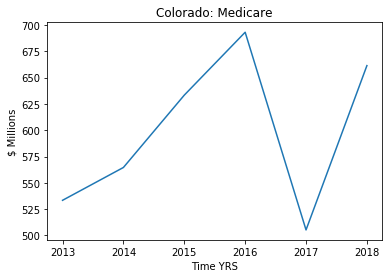

In [72]:
plot_line_costs(medicare_co_dfs, 'Colorado', 'MEDICARE', col_one)

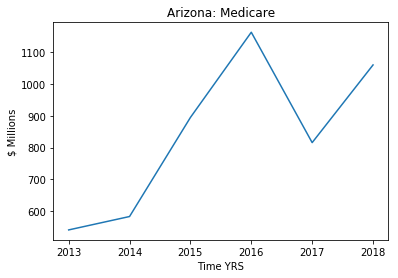

In [73]:
plot_line_costs(medicare_az_dfs, 'Arizona', 'MEDICARE', col_one)

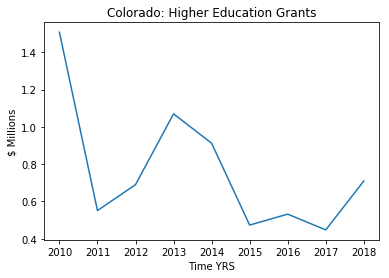

In [74]:
plot_line_costs(converted_awards_colorado, 'Colorado', 'HIGHER EDUCATION GRANTS', col_one)

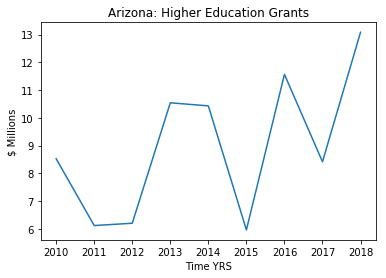

In [75]:
plot_line_costs(converted_awards_arizona, 'Arizona', 'HIGHER EDUCATION GRANTS', col_one)